### importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"D:\Python Projects\algeraian forest fires\Algerian_forest_fires_Cleaned.csv")

In [3]:
df.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0


#### Basic Cleaning

In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)


In [5]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
# encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

### Independent and Dependent Features

In [10]:
x=df.drop(['FWI'],axis=1)
y=df['FWI']

In [11]:
x.head(2)


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0


### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

### Feature Selection Based On Correlation

<Axes: >

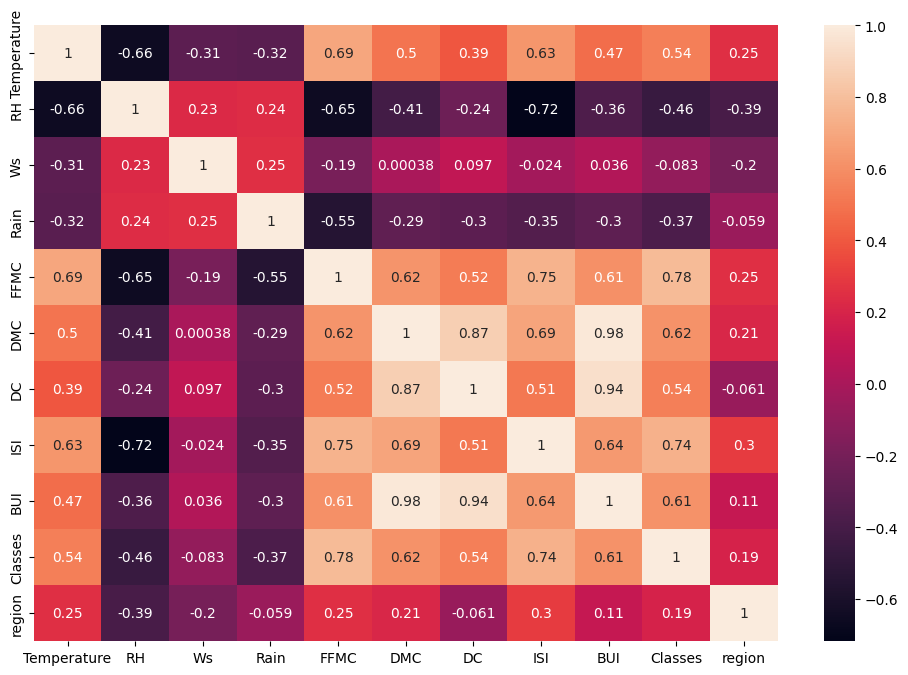

In [14]:
# checking for multicollinearity
correlation=x_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,)

In [15]:
# function to check highly correlated features
def correl(dataset,threshold):
    col_corr=set() # Set of all the names of correlated columns
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                colname=correlation_matrix.columns[i] # getting the name of column
                col_corr.add(colname) # adding the column to the set
    return col_corr

In [16]:
# threshold value is set by >>> domain expertise
corr_features=correl(x_train,0.85)

In [17]:
# dropping the highly correlated features
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [18]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [20]:
x_train

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

### Implementing Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
LinearModel=LinearRegression()
LinearModel.fit(x_train,y_train)
y_pred=LinearModel.predict(x_test)
MAE=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error: ",MAE)
print("R2_Score: ",score)

Mean Absolute Error:  0.5468236465249978
R2_Score:  0.9847657384266951


### Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lassomodel=Lasso()
lassomodel.fit(x_train,y_train)
y_pred=lassomodel.predict(x_test)

MAE=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE: ",MAE)
print("R2 Score: ",score)

MAE:  1.133175994914409
R2 Score:  0.9492020263112388


### Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)

MAE=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE: ",MAE)
print("R2 Score: ",score)

MAE:  0.5642305340105715
R2 Score:  0.9842993364555512


### ElasticNet Regression


In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic_model=ElasticNet()
elastic_model.fit(x_train,y_train)
y_pred=elastic_model.predict(x_test)

MAE=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE: ",MAE)
print("R2 Score: ",score)

MAE:  1.8822353634896005
R2 Score:  0.8753460589519703


## Hyperparameter Tuning

### Lasso Validation

In [25]:
# cross validation lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train,y_train)



LassoCV(cv=5)

In [26]:
lassocv.predict(x_test)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [29]:
lassocv.alpha_

0.05725391318234408

In [ ]:
lassocv.mse_path_

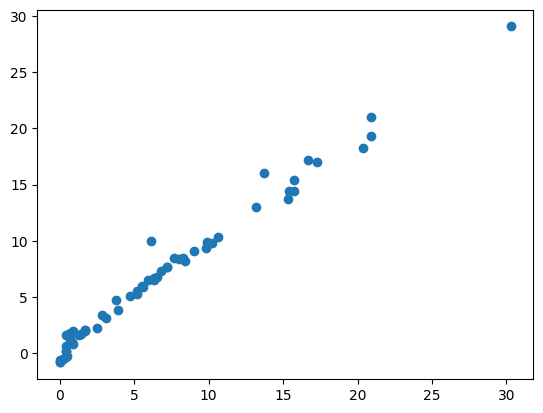

In [31]:
y_pred=lassocv.predict(x_test)
plt.scatter(y_test,y_pred)

In [32]:
MAE=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE: ",MAE)
print("R2 Score: ",score)


MAE:  0.619970115826343
R2 Score:  0.9820946715928275


### Ridge Validation


MAE:  0.5642305340105715
R2 Score:  0.9842993364555512


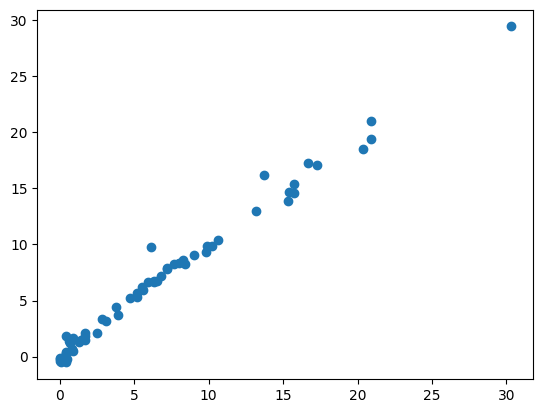

In [35]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train,y_train)
y_pred=ridgecv.predict(x_test)
plt.scatter(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE: ",MAE)
print("R2 Score: ",score)

### ElasticNet CV

MAE:  0.6575946731430898
R2 Score:  0.9814217587854941


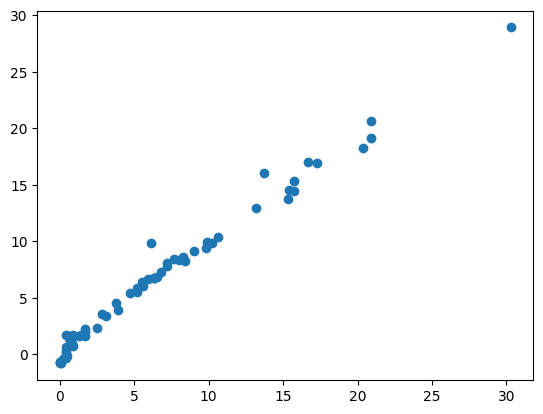

In [38]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(x_train,y_train)
y_pred=elasticnetcv.predict(x_test)
plt.scatter(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE: ",MAE)
print("R2 Score: ",score)